<a href="https://colab.research.google.com/github/Mic-73/GenAI/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Author: Michael Wood

### Purpose: In this assignment, we compare the performance of a simple Multi-Layer Perceptron (MLP) and a Convolutional Neural Network (CNN) using strides on the CIFAR-10 dataset.
### Note: Initial code for the MLP and CNN models was taken from the course's Github repo: https://github.com/bforoura/GenAI/tree/main/Module2. The code was modified to fit this assignment's requirements.
---

# Code

## 1. Data Preprocessing

In [1]:
#@title Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for tensors
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

import keras
from keras import layers
#from keras import ops

In [2]:
#@title Loading the CIFAR-10 Dataset

# Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
#@title Normalize the Images

# Parameters
NUM_CLASSES = 10

# Divide by 255
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 2. MLP Model

In [4]:
#@title Model Function, Compiling, and Training

def create_mlp_model(input_shape):
    model = keras.Sequential()                                   # Sequential
    model.add(layers.InputLayer(input_shape))                    # Input Layer
    model.add(layers.Flatten())                                  # Flatten
    model.add(layers.Dense(300, activation="relu"))              # Dense Layer
    model.add(layers.Dense(200, activation="relu"))              # Dense Layer
    model.add(layers.Dense(100, activation="relu"))              # Dense Layer
    model.add(layers.Dropout(rate=0.6))                          # Dropout Layer
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))   # Output Layer
    return model

# Set input shape
input_shape = (32, 32, 3)
model = create_mlp_model(input_shape)

# Compile the model
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.2038 - loss: 2.1428 - val_accuracy: 0.3494 - val_loss: 1.8086
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3341 - loss: 1.8509 - val_accuracy: 0.3569 - val_loss: 1.7874
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.3739 - loss: 1.7631 - val_accuracy: 0.4195 - val_loss: 1.6463
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3946 - loss: 1.7017 - val_accuracy: 0.4403 - val_loss: 1.5825
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.4102 - loss: 1.6523 - val_accuracy: 0.4356 - val_loss: 1.5692
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.4233 - loss: 1.6228 - val_accuracy: 0.4464 - val_loss: 1.5424
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.4345 - loss: 1.5952 - val_accuracy: 0.4637 - val_loss: 1.4970
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4463 -

In [5]:
#@title 4. Evaluation

# Evaluate the model
print("Model evaluation: ")
model.evaluate(x_test, y_test)

Model evaluation: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4657 - loss: 1.4800


[1.487051010131836, 0.4666000008583069]

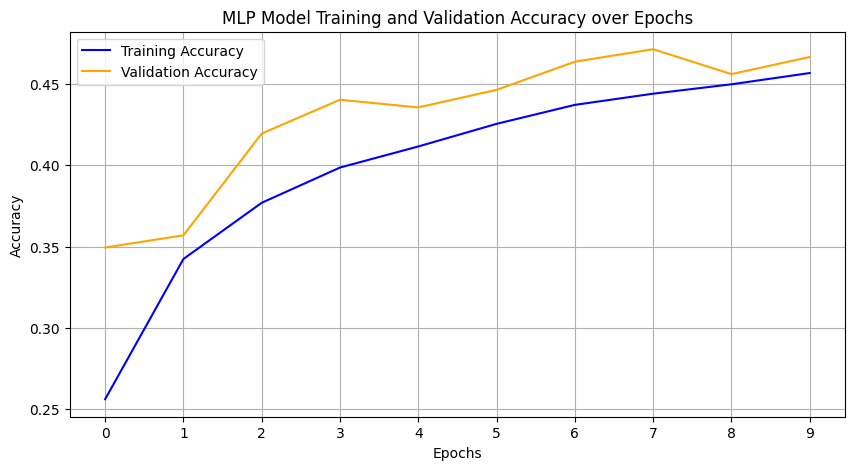

In [7]:
#@title 5. Plotting Results

# Plot the results (training and validation accuracy)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('MLP Model Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(len(history.history['val_accuracy'])))
plt.legend()
plt.grid()
plt.show()

## 3. CNN Model

In [8]:
#@title Model Function, Compiling, and Training

def create_cnn_model(input_shape):
    model = keras.Sequential()                                                       # Sequential
    model.add(layers.Input(input_shape))                                             # Input Layer
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))   # Convolution Layer
    model.add(layers.BatchNormalization())                                           # Batch Normalization
    model.add(layers.LeakyReLU())                                                    # Leaky ReLU
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))   # Convolution Layer
    model.add(layers.BatchNormalization())                                           # Batch Normalization
    model.add(layers.LeakyReLU())                                                    # Leaky ReLU
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))   # Convolution Layer
    model.add(layers.BatchNormalization())                                           # Batch Normalization
    model.add(layers.LeakyReLU())                                                    # Leaky ReLU
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))   # Convolution Layer
    model.add(layers.BatchNormalization())                                           # Batch Normalization
    model.add(layers.LeakyReLU())                                                    # Leaky ReLU
    model.add(layers.Flatten())                                                      # Flatten
    model.add(layers.Dense(150, activation="relu"))                                  # Dense Layer
    model.add(layers.BatchNormalization())                                           # Batch Normalization
    model.add(layers.LeakyReLU())                                                    # Leaky ReLU
    model.add(layers.Dropout(rate=0.6))                                              # Dropout Layer
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))                       # Output Layer
    return model

# Set input shape
input_shape = (32, 32, 3)
model = create_cnn_model(input_shape)

# Compile the model
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 74ms/step - accuracy: 0.3584 - loss: 1.9580 - val_accuracy: 0.5303 - val_loss: 1.3255
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 76ms/step - accuracy: 0.5544 - loss: 1.2649 - val_accuracy: 0.5809 - val_loss: 1.1472
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 73ms/step - accuracy: 0.6180 - loss: 1.0925 - val_accuracy: 0.6612 - val_loss: 0.9660
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6575 - loss: 0.9856 - val_accuracy: 0.6580 - val_loss: 0.9693
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.6821 - loss: 0.9093 - val_accuracy: 0.6926 - val_loss: 0.8696
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 74ms/step - accuracy: 0.7036 - loss: 0.8505 - val_accuracy: 0.6504 - val_loss: 0.9734
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.7196 - loss: 0.8090 - val_accuracy: 0.7067 - val_loss: 0.8356
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 72ms/step - accuracy: 

In [9]:
#@title 4. Evaluation

# Evaluate the model
print("Model evaluation: ")
model.evaluate(x_test, y_test)

Model evaluation: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6948 - loss: 0.8902


[0.89938884973526, 0.6898000240325928]

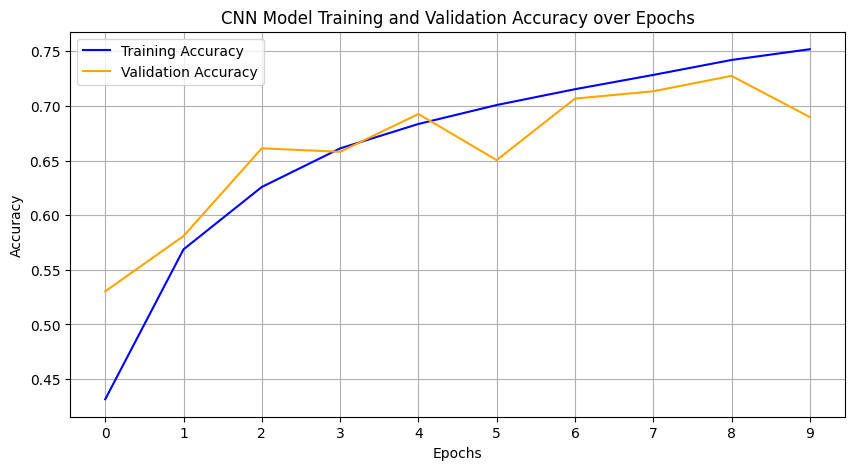

In [10]:
#@title 5. Plotting Results

# Plot the results (training and validation accuracy)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN Model Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(len(history.history['val_accuracy'])))
plt.legend()
plt.grid()
plt.show()

---
# Discussion Points

Performance Comparison: Discuss the test accuracy and loss of both models.

*   Performance Comparison: It appears that both the accuracy was higher and the loss was lower for the CNN model than the MLP model. For the MLP model, the test accuracy was 0.4657, and the test loss was 1.4800. For the CNN model, the test accuracy was 0.6848, and the test loss was 0.8902.
*   Model Complexity: CNNs are generally better suited for image classification tasks compared to MLPs because CNNs consider the spacial structure of an image. CNNs have convolutional layers to help flatten the image into a single vector before going through the first dense layer using filters, tensors, and strides.
*   Training Time: The CNN model took significantly longer to train and used up more resources than the MLP model. The MLP model took around 6 minutes to train while the CNN model took around 21 minutes to train. This may be due to the added convolutional layers in the CNN model increasing the training time.
*   Overfitting and Regularization: There may be signs of overfitting in the CNN model since the validation accuracy is about the same or lower than the training accuracy throughout the 10 epochs. Regulization techniques like Dropout help avoid overfitting by placing constraints on the complexity and familiarity of the model during its training.
---